## project in machine learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import preprocessing, metrics, svm, neighbors, tree, decomposition
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score

# ---------------------------

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline, model_selection, feature_extraction, naive_bayes, linear_model, neural_network, cluster
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB

# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condense every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

In [2]:
filename  = 'death_prediction_synthetic.csv'

df = pd.read_csv(filename)

In [3]:
df.head(20)

,age,sex,marital_status,ses,residence_cd,residence,weigh,heigh,BMI,bp_sys,bp_dias,bp_cat,smoking,smoking_status,HbA1c,glucose,creatinin,albumin,alb24h,ACR,cholesterol_total,LDL,HDL,triglycerides,TSH,gravity_u,nitrites_u,leuko_u,proteinuria,WBC,RBC,platelets,MCV,MPV,Charlson,framingham_cvd,antidiabetics,ERD,CVD,HTN,cancer,cardiovascular_meds,statines,immigrant,dead_5y
0,49,2,U,1,1,urban,84.000,160.000,32.790,116,66,Normal,1,non_smoker,11.000,238,0.580,3.940,32.000,6.000,211.600,114.000,39.000,373,12.500,1.025,0.000,0.000,0.000,10.600,5.110,295,87.900,7.700,1,0.129,1,0,0,1,0,1,1,0,0
1,46,2,M,1,1,urban,67.000,152.000,29.380,113,74,Normal,1,non_smoker,7.000,119,0.650,4.500,17.900,3.870,154.000,79.000,41.000,204,13.500,1.021,0.000,0.000,0.000,8.700,4.450,204,78.100,8.200,1,0.085,1,0,0,0,0,1,1,0,0
2,46,2,U,1,1,urban,62.400,148.000,28.310,133,87,Pre-HTN,1,non_smoker,11.800,202,0.590,NaN,NaN,6.350,252.000,65.000,57.000,272,13.800,1.030,0.000,0.000,0.000,11.500,5.730,772,85.100,10.200,1,0.107,1,0,0,1,0,1,1,0,0
3,45,1,U,2,1,urban,73.900,166.000,26.850,100,63,Normal,3,current_smoker,6.900,203,0.700,4.600,9.100,5.000,149.000,92.000,37.000,84,12.600,1.017,0.000,1.000,0.000,9.100,5.060,299,84.600,9.100,1,0.101,1,0,0,0,0,0,1,0,0
4,49,2,U,1,1,urban,53.000,161.000,20.450,110,70,Normal,1,non_smoker,8.700,152,0.750,4.400,NaN,0.480,178.000,94.800,57.000,140,11.900,1.028,0.000,0.000,0.000,6.100,4.640,181,89.800,8.900,1,0.040,1,0,0,0,0,0,1,0,0
5,41,1,M,1,1,urban,107.000,193.000,28.860,115,80,Normal,3,current_smoker,6.900,143,0.900,4.800,NaN,5.000,187.000,112.500,31.000,182,12.100,1.025,0.000,0.000,0.000,10.600,5.200,313,82.200,10.100,1,0.157,1,0,0,0,0,1,0,0,0
6,46,2,U,2,1,urban,89.000,172.000,30.270,123,84,Normal,3,current_smoker,5.700,134,0.890,4.600,NaN,5.000,140.000,79.900,43.000,68,16.100,1.020,0.000,0.000,0.000,7.300,4.200,290,80.600,9.100,1,0.121,1,0,0,1,0,1,0,0,0
7,47,1,M,2,1,urban,85.000,175.000,27.920,120,80,Normal,1,non_smoker,7.300,152,0.960,4.600,45.000,30.000,158.600,87.700,31.000,187,13.200,NaN,NaN,NaN,NaN,9.500,4.960,307,86.700,9.300,2,0.117,1,0,0,0,0,1,1,0,0
8,42,1,M,1,1,urban,87.000,175.000,28.410,110,60,Normal,1,non_smoker,6.400,117,0.740,4.400,NaN,4.160,180.000,117.900,43.000,111,12.200,1.025,0.000,0.000,0.000,7.600,5.340,215,83.700,10.400,1,0.048,0,0,0,0,0,0,0,0,0
9,44,2,M,1,1,urban,72.000,164.000,26.770,137,76,Pre-HTN,1,non_smoker,6.100,55,0.490,4.250,NaN,3.140,214.000,98.000,80.000,76,11.800,1.011,0.000,0.000,0.000,9.960,4.250,396,89.100,7.500,2,0.096,1,0,0,0,0,0,0,0,0


## מסננים מאפיינים מיותרים

רואים ש-smoking status זה בדיוק smoking

רואים ש-residence_cd זה בדיוק residence

In [4]:
df = df.drop(columns=['smoking_status','residence'])

In [5]:
len(df[df["cancer"]==1])

0

אין אף אחד עם cancer

In [6]:
df = df.drop(columns=['cancer'])

## מידע על המאפיינים

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12438 entries, 0 to 12437
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12438 non-null  int64  
 1   sex                  12438 non-null  int64  
 2   marital_status       12438 non-null  object 
 3   ses                  12438 non-null  int64  
 4   residence_cd         12438 non-null  int64  
 5   weigh                12438 non-null  float64
 6   heigh                12438 non-null  float64
 7   BMI                  12438 non-null  float64
 8   bp_sys               12438 non-null  int64  
 9   bp_dias              12438 non-null  int64  
 10  bp_cat               12438 non-null  object 
 11  smoking              12438 non-null  int64  
 12  HbA1c                12438 non-null  float64
 13  glucose              12438 non-null  int64  
 14  creatinin            12438 non-null  float64
 15  albumin              10975 non-null 

## תרגום מחרוזות לערכים מספריים

#### אנחנו מחליפים פה ערכים כמו מחרוזות למספרים, למשל מצב נישואים מחליפים ולמספר 0 או 1
למה? כי מודל למידת מכונה לא יודע לאכול מחרוזות

In [8]:
df['marital_status'] = pd.factorize(df['marital_status'])[0]
df['bp_cat'] = pd.factorize(df['bp_cat'])[0]

## Nan מילוי חסרים
albumin - נחליף חסרים בחציון. למה? כי אדם בריא יש לו בערך 4 ולא 0 חלילה

alb24h - נחליף חסרים בערך 1 

gravity_u - נחליף חסרים בחציון

nitrites_u - נחליף חסרים בערך 0 שהוא הערך הרצוי אצל אדם בריא 

leuko_u - נחליף חסרים בערך 0 שהוא הערך הרצוי אצל אדם בריא

proteinuria - נחליף חסרים בערך 0 שהוא הערך הרצוי אצל אדם בריא

ACR - נחליף חסרים בערך 0 שהוא הערך הרצוי אצל אדם בריא

In [9]:
df['albumin'] = df['albumin'].fillna(df['albumin'].median())
df['gravity_u'] = df['gravity_u'].fillna(df['gravity_u'].median())

values = {"alb24h": 1, "nitrites_u": 0, "leuko_u": 0, "proteinuria": 0, "ACR": 0}
df = df.fillna(value=values)

## נרצה לבדוק עם יש כפילויות

In [10]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


## נרצה להוסיף עמודות שמרמזות על תמותה
לפי מידע מקצועי שקראנו בנושא

In [11]:
df['num_of_disease'] = df['antidiabetics']+df['ERD']+df['CVD']
df['LDL_HDL_ratio'] = df['LDL']/df['HDL']
df['Charlson_framingham_cvd_ratio'] = df['Charlson']/df['framingham_cvd']
df['framingham_cvd_smoking_ratio'] = df['framingham_cvd']/df['smoking']
df['LDL_total_ratio'] = df['LDL']/df['cholesterol_total']
df['WBC_RBC_ratio'] = df['WBC']/df['RBC']
df['bp_sys_bp_dias_ratio'] = df['bp_sys']/df['bp_dias']
df['bp_sum']= (df['bp_sys']+df['bp_dias']+df['bp_cat'])/3
df['diabetes_risk'] = (df['HbA1c'] + df['glucose']) / 2
df['kidney_function_score'] = df['creatinin'] + df['albumin'] + df['alb24h'] + df['ACR']

## רוצים להוסיף עמודות קטגוריאליות

In [12]:
df['age_category'] = pd.cut(df['age'], bins=3, labels=[0, 1, 2], include_lowest=True).astype(int)
df['weigh_category'] = pd.cut(df['weigh'], bins=3, labels=[0, 1, 2], include_lowest=True).astype(int)
df['heigh_category'] = pd.cut(df['heigh'], bins=3, labels=[0, 1, 2], include_lowest=True).astype(int)
df['BMI_category'] = pd.cut(df['BMI'], bins=3, labels=[0, 1, 2], include_lowest=True).astype(int)
df['bp_sys_category'] = pd.cut(df['bp_sys'], bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['bp_dias_category'] = pd.cut(df['bp_dias'], bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['bp_cat_category'] = pd.cut(df['bp_cat'], bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['HbA1c_category'] = pd.cut(df['HbA1c'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['glucose_category'] = pd.cut(df['glucose'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['creatinin_category'] = pd.cut(df['creatinin'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['albumin_category'] = pd.cut(df['albumin'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['alb24h_category'] = pd.cut(df['alb24h'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['ACR_category'] = pd.cut(df['ACR'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['cholesterol_total_category'] = pd.cut(df['cholesterol_total'], bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['LDL_category'] = pd.cut(df['LDL'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['HDL_category'] = pd.cut(df['HDL'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['triglycerides_category'] = pd.cut(df['triglycerides'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['TSH_category'] = pd.cut(df['TSH'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['gravity_u_category'] = pd.cut(df['gravity_u'], bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['nitrites_u_category'] = pd.cut(df['nitrites_u'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['leuko_u_category'] = pd.cut(df['leuko_u'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['proteinuria_category'] = pd.cut(df['proteinuria'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['WBC_category'] = pd.cut(df['WBC'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['RBC_category'] = pd.cut(df['RBC'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['platelets_category'] = pd.cut(df['platelets'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['MCV_category'] = pd.cut(df['MCV'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['MPV_category'] = pd.cut(df['MPV'],  bins=10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], include_lowest=True).astype(int)
df['Charlson_category'] = pd.cut(df['Charlson'], bins=3, labels=[0, 1, 2], include_lowest=True).astype(int)
df['framingham_cvd_category'] = pd.cut(df['framingham_cvd'], bins=3, labels=[0, 1, 2], include_lowest=True).astype(int)

## נשארים או עם המשתנה הקטגוריאלי או עם הרציף, למי שהקורולציה הגבוהה

In [13]:
def correlation_with_dead(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    correlation_results = {}
    
    for column in numeric_columns:
        correlation = df['dead_5y'].corr(df[column])
        correlation_results[column] = correlation
    
    correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation with Dead'])
    return correlation_df

In [14]:
columns_without_dead_5y = [col for col in df.columns if col != 'dead_5y']
correlation_df = correlation_with_dead(df)

for column in columns_without_dead_5y:
    category_column = f"{column}_category"
    
    if category_column in correlation_df.index:
        correlation_original = abs(correlation_df.at[column, 'Correlation with Dead'])
        correlation_category = abs(correlation_df.at[category_column, 'Correlation with Dead'])
        
        if correlation_category > correlation_original:
            # Drop the original column if the correlation with the category column is better
            df.drop(column, axis=1, inplace=True)
        else:
            df.drop(f"{column}_category", axis=1, inplace=True)

## בודקים קורולציה של המאפיינים ביחס למשתנה המטרה

In [15]:
correlation_df = correlation_with_dead(df)
with pd.option_context('display.max_rows', None):
    print(correlation_df)

                               Correlation with Dead
age                                            0.010
sex                                           -0.007
marital_status                                -0.106
ses                                            0.023
residence_cd                                   0.002
heigh                                         -0.006
bp_sys                                         0.055
bp_dias                                        0.021
bp_cat                                         0.041
smoking                                        0.036
alb24h                                         0.004
cholesterol_total                              0.036
HDL                                            0.019
triglycerides                                  0.009
TSH                                            0.057
proteinuria                                    0.062
WBC                                            0.031
RBC                                           

## מסננים כל המשתנים שהקורלציה שלהם למשתנה המטרה קטנה מערך מסוים

In [16]:
def drop_low_correlation_columns(df, threshold=0.025):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    
    for column in numeric_columns:
        correlation = df['dead_5y'].corr(df[column])
        if abs(correlation) < threshold:
            df.drop(column, axis=1, inplace=True)
    
    return df

In [17]:
your_dataframe = drop_low_correlation_columns(df)

In [18]:
correlation_df = correlation_with_dead(df)
with pd.option_context('display.max_rows', None):
    print(correlation_df)

                      Correlation with Dead
marital_status                       -0.106
bp_sys                                0.055
bp_cat                                0.041
smoking                               0.036
cholesterol_total                     0.036
TSH                                   0.057
proteinuria                           0.062
WBC                                   0.031
MPV                                   0.029
framingham_cvd                        0.055
antidiabetics                        -0.048
ERD                                   0.053
CVD                                   0.060
HTN                                   0.025
immigrant                             0.030
dead_5y                               1.000
WBC_RBC_ratio                         0.035
bp_sys_bp_dias_ratio                  0.038
bp_sum                                0.046
BMI_category                          0.028
creatinin_category                    0.052
albumin_category                

## נבדוק קורלציה בין המאפיינים כדי להסיר כאלה שקרובים

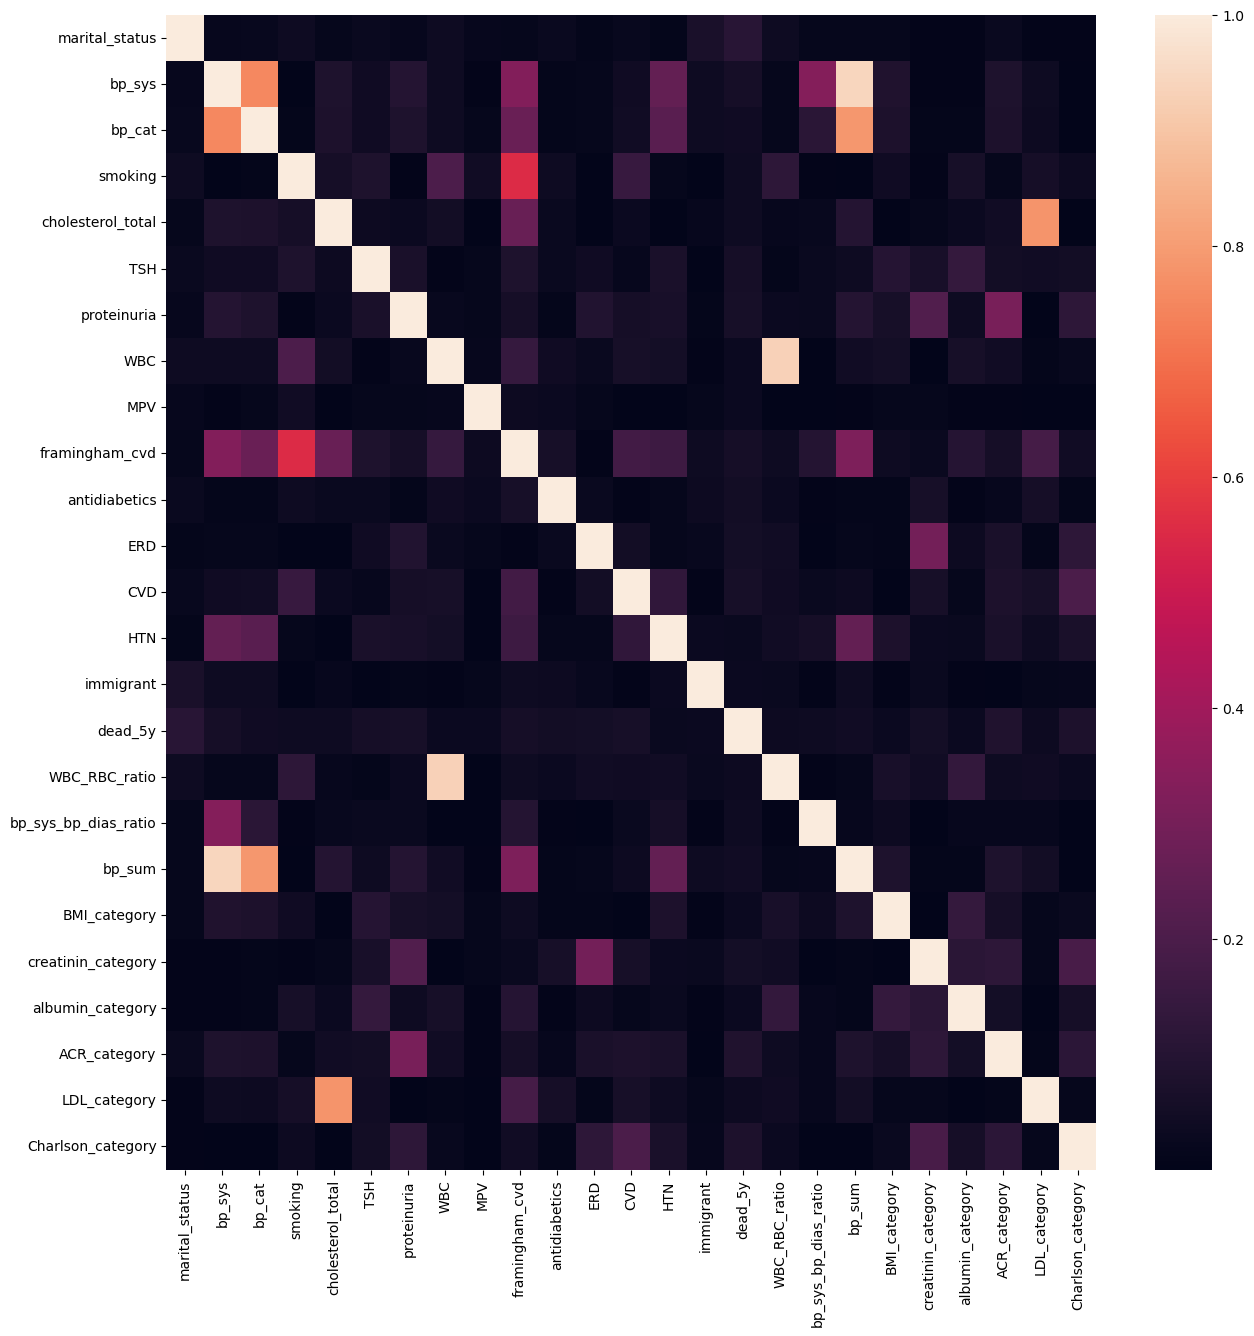

In [19]:
# shows the heatmap
def correlations(df):
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr().abs())
    
correlations(df)

## נוריד מאפיינים בעלי קורלציה גבוהה

In [20]:
df = df.drop(columns=['LDL_category', 'bp_cat', 'bp_sum', 'WBC', 'smoking'])

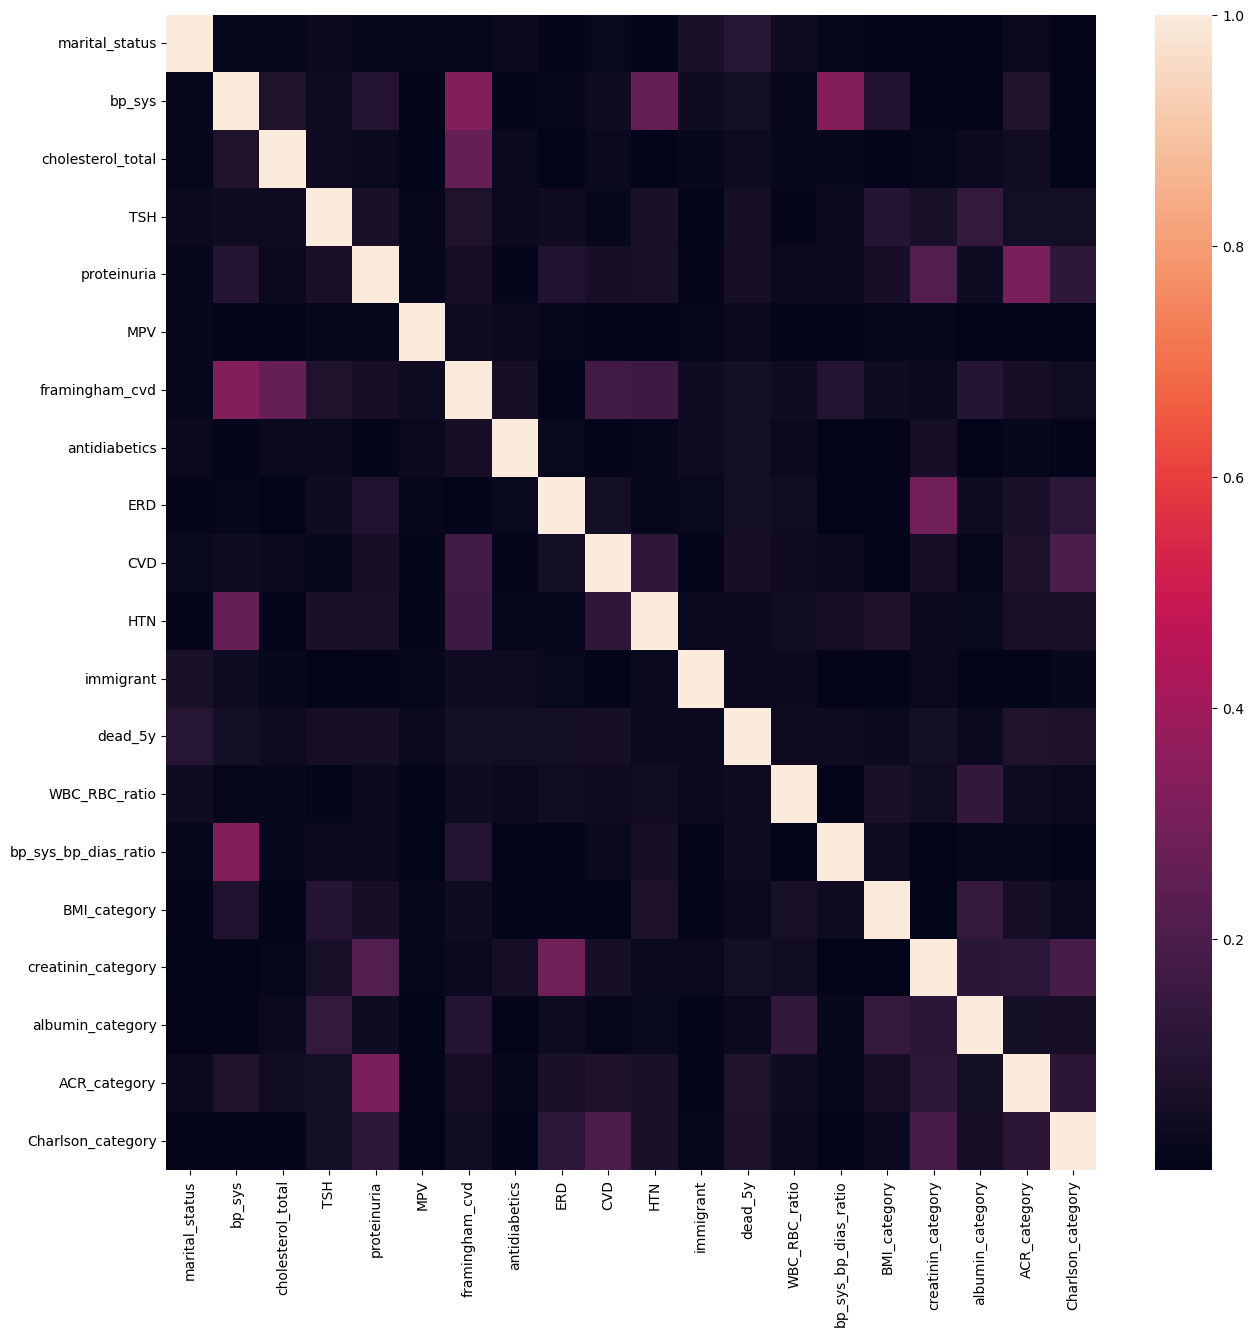

In [21]:
correlations(df)

##  outlier נרצה לסנן

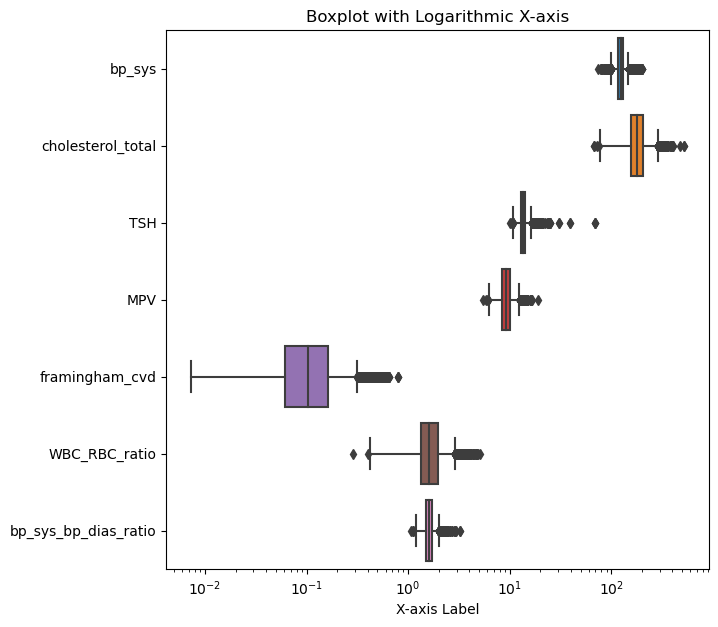

In [22]:
# Create a larger figure with more height
plt.figure(figsize=(7, 7))

# We scale the X-axis logarithmically
plt.xscale('log')

# Plot the boxplot horizontally (orient="h")
tmp_df = df.drop(columns=['ACR_category', 'Charlson_category', 'creatinin_category', 'albumin_category',
                         'BMI_category', 'HTN', 'ERD', 'marital_status', 'immigrant', 'CVD',
                          'proteinuria', 'antidiabetics', 'dead_5y'])

sns.boxplot(data=tmp_df, orient="h")
# Set labels and titles if needed
plt.xlabel("X-axis Label");
plt.title("Boxplot with Logarithmic X-axis");

# Show the plot
plt.show();

In [23]:
continuous_columns = ['bp_sys', 'cholesterol_total', 'TSH', 'MPV', 'framingham_cvd',
                     'WBC_RBC_ratio', 'bp_sys_bp_dias_ratio']

# Initialize an empty mask with all True values
row_mask = pd.Series(True, index=df.index)

# Loop through each continuous feature
for feature in continuous_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate upper and lower bounds for the feature
    upper_bound = Q3 + 6 * IQR
    lower_bound = Q1 - 6 * IQR

    # Update the row_mask for rows where the feature exceeds bounds
    row_mask &= ~((df[feature] > upper_bound) | (df[feature] < lower_bound))

# Filter the DataFrame to keep only rows that meet the condition
df = df[row_mask]

# Reset the index if needed
df = df.reset_index(drop=True)

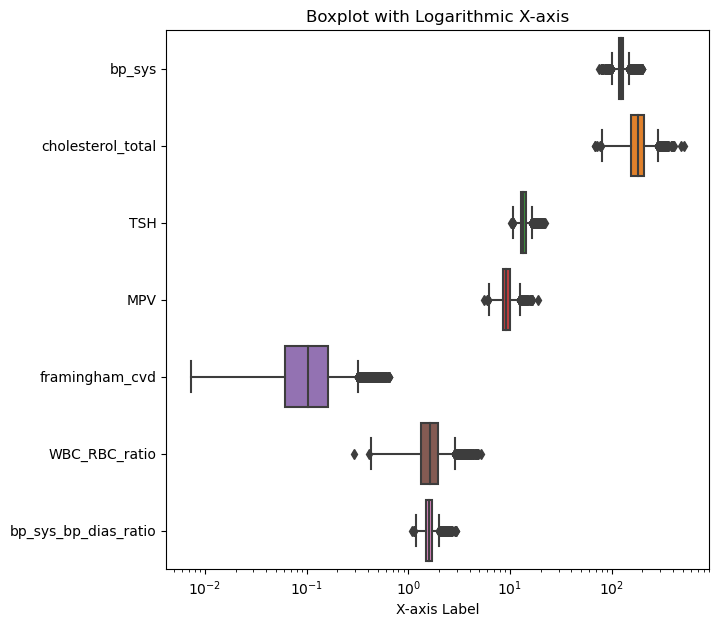

In [24]:
# Create a larger figure with more height
plt.figure(figsize=(7, 7))

# We scale the X-axis logarithmically
plt.xscale('log')

# Plot the boxplot horizontally (orient="h")
tmp_df = df.drop(columns=['ACR_category', 'Charlson_category', 'creatinin_category', 'albumin_category',
                         'BMI_category', 'HTN', 'ERD', 'marital_status', 'immigrant', 'CVD',
                          'proteinuria', 'antidiabetics', 'dead_5y'])

sns.boxplot(data=tmp_df, orient="h")
# Set labels and titles if needed
plt.xlabel("X-axis Label");
plt.title("Boxplot with Logarithmic X-axis");

# Show the plot
plt.show();

## נרצה לנרמל את המאפיינים

In [25]:
def comparison_alive_and_dead(df):
    target_column = "dead_5y"
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    
    num_plots = len(numeric_columns)
    num_cols = 2  # Number of columns in the collage
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numeric_columns):
        ax = axes[i]
        sns.kdeplot(data=df[df[target_column] == 1][column], color="red", ax=ax)
        sns.kdeplot(data=df[df[target_column] == 0][column], color="green", ax=ax)
        ax.set_title(f"Distribution of {column}")
        
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    red_patch = plt.Line2D([0], [0], color="red", label="Dead")
    green_patch = plt.Line2D([0], [0], color="green", label="Alive")
    fig.legend(handles=[red_patch, green_patch], loc='upper right')
    
    plt.tight_layout()
    plt.show()

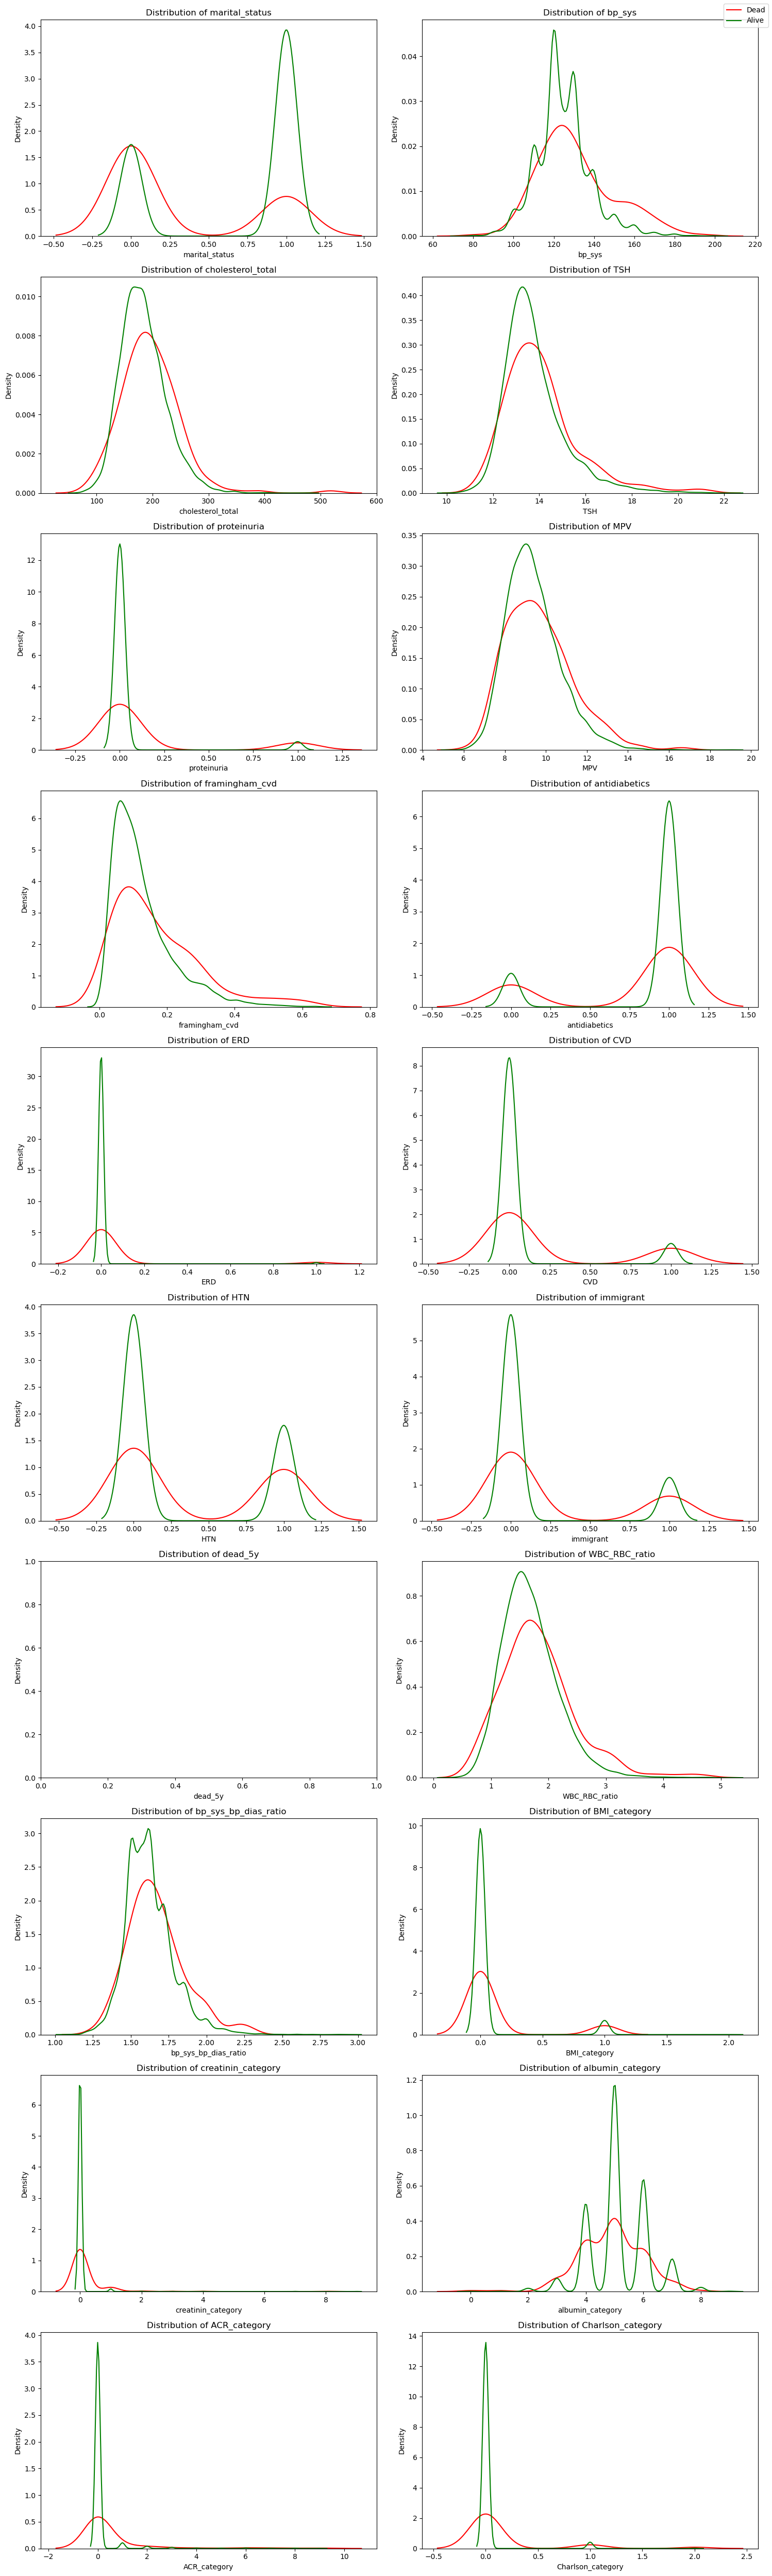

In [26]:
comparison_alive_and_dead(df);

## מנרמלים מאפיינים שמתפלגים באופן קרוב לנורמלי

In [27]:
columns_without_dead_5y = [col for col in df.columns if col != 'dead_5y']

for column in columns_without_dead_5y:
    mean = df[column].mean()
    std = df[column].std()
    df[column] = (df[column] - mean) / std

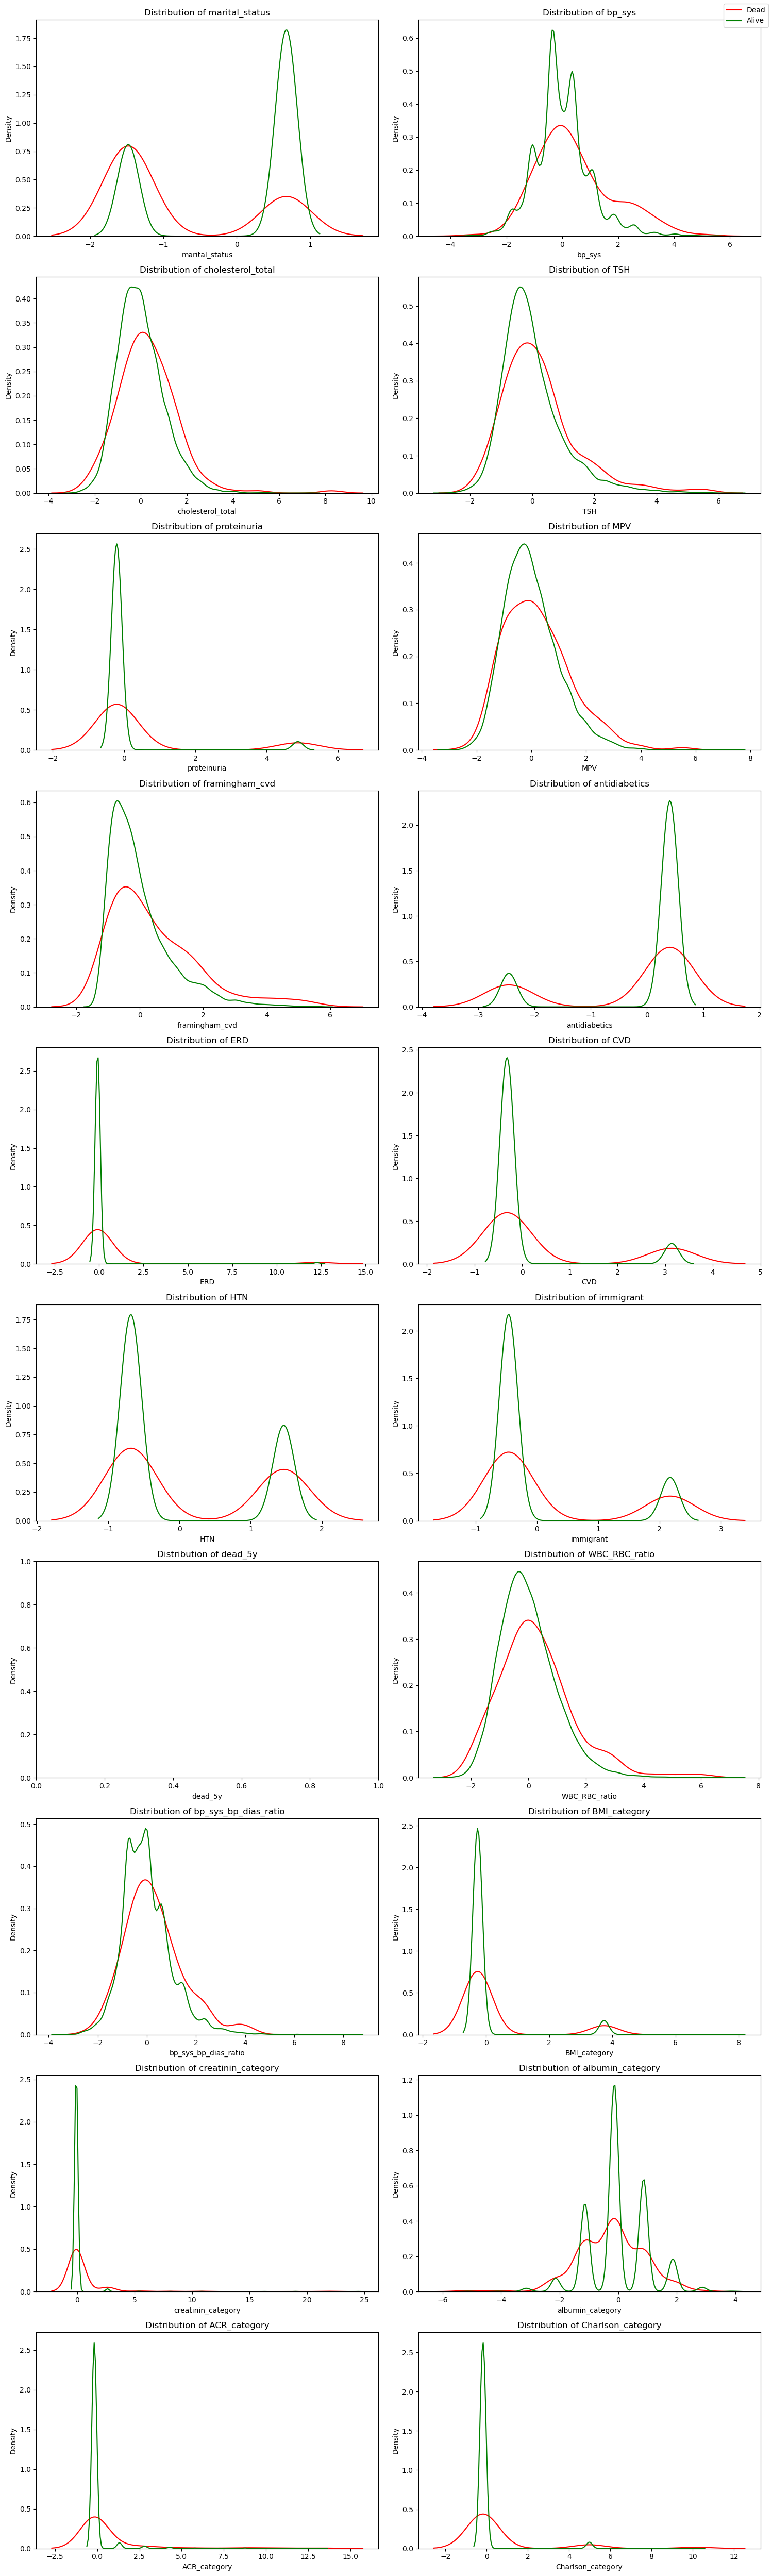

In [28]:
comparison_alive_and_dead(df);

## נשארנו עם 19 מאפיינים חזקים PCA טבלה סופית לפני 

In [29]:
df.head(20)

,marital_status,bp_sys,cholesterol_total,TSH,proteinuria,MPV,framingham_cvd,antidiabetics,ERD,CVD,HTN,immigrant,dead_5y,WBC_RBC_ratio,bp_sys_bp_dias_ratio,BMI_category,creatinin_category,albumin_category,ACR_category,Charlson_category
0,-1.480,-0.646,0.690,-0.965,-0.205,-1.283,0.018,0.407,-0.082,-0.319,1.464,-0.460,0,0.794,0.845,-0.265,-0.092,-1.138,-0.175,-0.179
1,0.676,-0.867,-0.734,-0.207,-0.205,-0.901,-0.460,0.407,-0.082,-0.319,-0.683,-0.460,0,0.552,-0.603,-0.265,-0.092,0.865,-0.175,-0.179
2,-1.480,0.602,1.690,0.020,-0.205,0.626,-0.219,0.407,-0.082,-0.319,1.464,-0.460,0,0.657,-0.592,-0.265,-0.092,-0.136,-0.175,-0.179
3,-1.480,-1.822,-0.858,-0.889,-0.205,-0.214,-0.285,0.407,-0.082,-0.319,-0.683,-0.460,0,0.233,-0.224,-0.265,-0.092,0.865,-0.175,-0.179
4,-1.480,-1.087,-0.141,-1.420,-0.205,-0.367,-0.954,0.407,-0.082,-0.319,-0.683,-0.460,0,-0.751,-0.324,-0.265,-0.092,-0.136,-0.175,-0.179
5,0.676,-0.720,0.082,-1.268,-0.205,0.549,0.320,0.407,-0.082,-0.319,-0.683,-0.460,0,0.721,-1.165,-0.265,-0.092,1.867,-0.175,-0.179
6,-1.480,-0.132,-1.080,1.763,-0.205,-0.214,-0.067,0.407,-0.082,-0.319,1.464,-0.460,0,0.110,-0.997,-0.265,-0.092,0.865,-0.175,-0.179
7,0.676,-0.353,-0.620,-0.435,-0.205,-0.061,-0.107,0.407,-0.082,-0.319,-0.683,-0.460,0,0.471,-0.773,-0.265,-0.092,0.865,-0.175,-0.179
8,0.676,-1.087,-0.091,-1.192,-0.205,0.778,-0.857,-2.456,-0.082,-0.319,-0.683,-0.460,0,-0.530,1.321,-0.265,-0.092,-0.136,-0.175,-0.179
9,0.676,0.896,0.750,-1.495,-0.205,-1.436,-0.342,0.407,-0.082,-0.319,-0.683,-0.460,0,1.342,1.128,-0.265,-0.092,-0.136,-0.175,-0.179


##  מידע סטטיסטי על המאפיינים

In [30]:
df.describe()

,marital_status,bp_sys,cholesterol_total,TSH,proteinuria,MPV,framingham_cvd,antidiabetics,ERD,CVD,HTN,immigrant,dead_5y,WBC_RBC_ratio,bp_sys_bp_dias_ratio,BMI_category,creatinin_category,albumin_category,ACR_category,Charlson_category
count,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000,12416.000
mean,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.016,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.124,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.480,-3.658,-2.861,-2.708,-0.205,-2.963,-1.303,-2.456,-0.082,-0.319,-0.683,-0.460,0.000,-2.836,-3.414,-0.265,-0.092,-5.144,-0.175,-0.179
25%,-1.480,-0.500,-0.685,-0.662,-0.205,-0.672,-0.712,0.407,-0.082,-0.319,-0.683,-0.460,0.000,-0.691,-0.727,-0.265,-0.092,-0.136,-0.175,-0.179
50%,0.676,-0.059,-0.091,-0.207,-0.205,-0.138,-0.271,0.407,-0.082,-0.319,-0.683,-0.460,0.000,-0.123,-0.108,-0.265,-0.092,-0.136,-0.175,-0.179
75%,0.676,0.382,0.599,0.399,-0.205,0.549,0.397,0.407,-0.082,-0.319,1.464,-0.460,0.000,0.559,0.573,-0.265,-0.092,0.865,-0.175,-0.179
max,0.676,5.523,8.264,6.384,4.877,7.344,5.610,0.407,12.264,3.139,1.464,2.172,1.000,7.071,8.334,7.742,24.427,3.870,13.215,10.144


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12416 entries, 0 to 12415
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   marital_status        12416 non-null  float64
 1   bp_sys                12416 non-null  float64
 2   cholesterol_total     12416 non-null  float64
 3   TSH                   12416 non-null  float64
 4   proteinuria           12416 non-null  float64
 5   MPV                   12416 non-null  float64
 6   framingham_cvd        12416 non-null  float64
 7   antidiabetics         12416 non-null  float64
 8   ERD                   12416 non-null  float64
 9   CVD                   12416 non-null  float64
 10  HTN                   12416 non-null  float64
 11  immigrant             12416 non-null  float64
 12  dead_5y               12416 non-null  int64  
 13  WBC_RBC_ratio         12416 non-null  float64
 14  bp_sys_bp_dias_ratio  12416 non-null  float64
 15  BMI_category       

## ל-3 מימדים PCA נרצה לראות בתלת-מימד את הדגימות של המתים והחיים לאחר

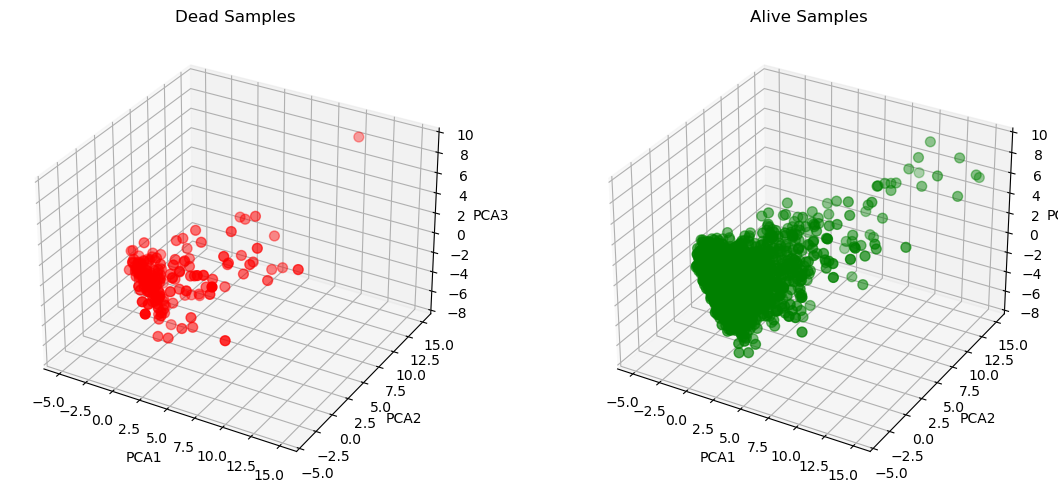

In [33]:
# Separate features and target
X = df.drop('dead_5y', axis=1)
y = df['dead_5y']

# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Combine reduced features with target for plotting
df_3d = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'PCA3': X_pca[:, 2], 'dead_5y': y})

# Separate data for 'dead' and 'alive' samples
dead_samples = df_3d[df_3d['dead_5y'] == 1]
alive_samples = df_3d[df_3d['dead_5y'] == 0]

# Create two separate 3D scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})

# Scatter plot for 'dead' samples in red
ax1.scatter(dead_samples['PCA1'], dead_samples['PCA2'], dead_samples['PCA3'], c='red', label='Dead', s=50)
ax1.set_xlabel('PCA1')
ax1.set_ylabel('PCA2')
ax1.set_zlabel('PCA3')
ax1.set_title('Dead Samples')

# Scatter plot for 'alive' samples in green
ax2.scatter(alive_samples['PCA1'], alive_samples['PCA2'], alive_samples['PCA3'], c='green', label='Alive', s=50)

ax1.set_xlim([-6, 16])
ax1.set_ylim([-5, 16])
ax1.set_zlim([-8, 10])

ax2.set_xlabel('PCA1')
ax2.set_ylabel('PCA2')
ax2.set_zlabel('PCA3')
ax2.set_title('Alive Samples')

ax2.set_xlim([-6, 16])
ax2.set_ylim([-5, 16])
ax2.set_zlim([-8, 10])

plt.tight_layout()
plt.show();

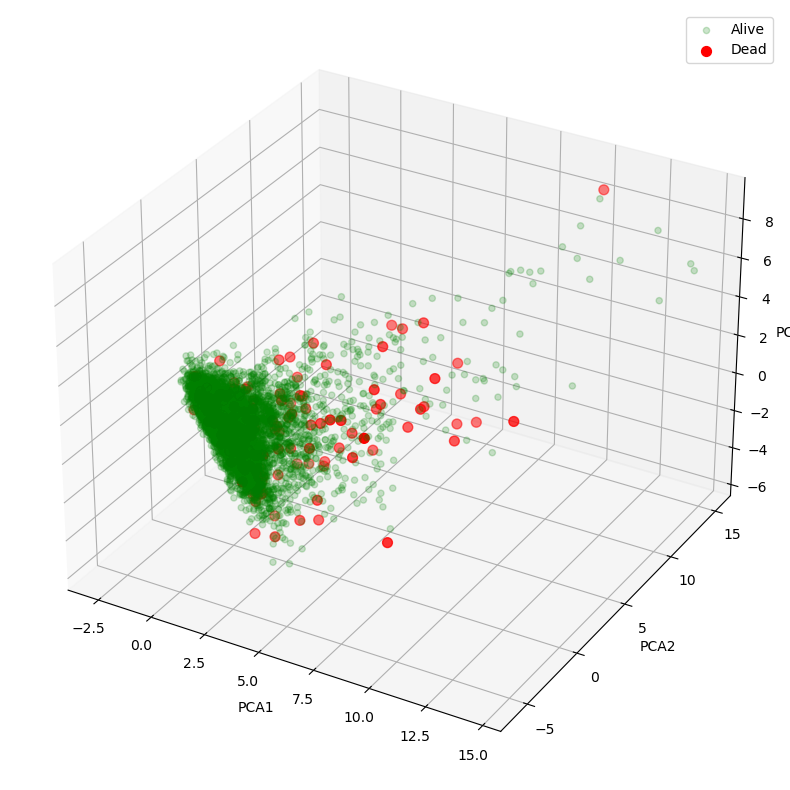

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(alive_samples['PCA1'], alive_samples['PCA2'], alive_samples['PCA3'], c='green', label='Alive', s=20, alpha=0.2)
ax.scatter(dead_samples['PCA1'], dead_samples['PCA2'], dead_samples['PCA3'], c='red', label='Dead', s=50)


ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()

plt.show();


## של מתים וחיים centroid-נראה את ה

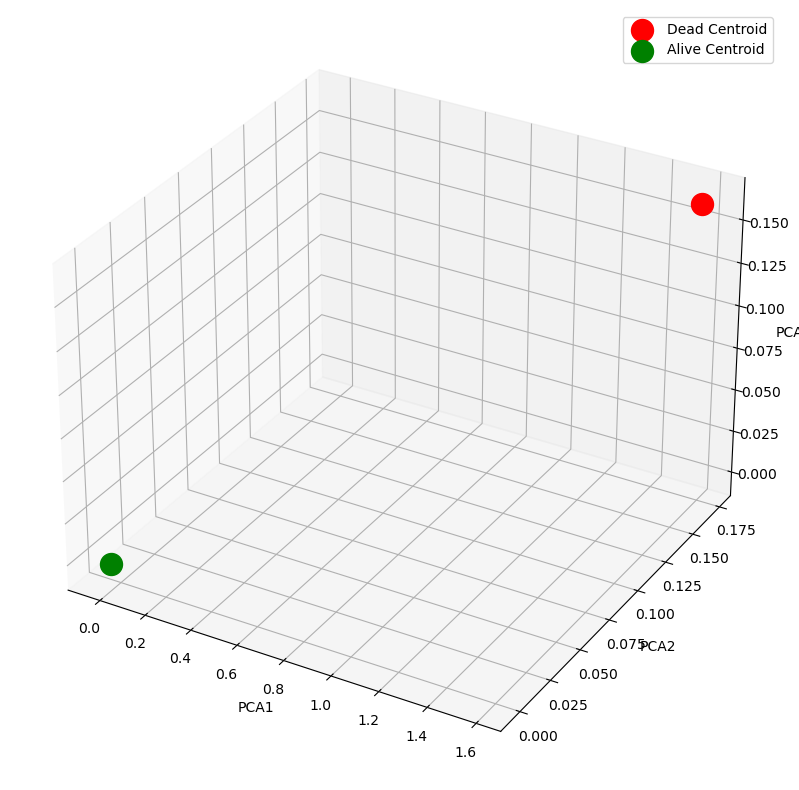

In [35]:
centroid_dead = [df_3d[df_3d['dead_5y'] == 1]['PCA1'].mean(), df_3d[df_3d['dead_5y'] == 1]['PCA2'].mean(), df_3d[df_3d['dead_5y'] == 1]['PCA3'].mean()]
centroid_alive = [df_3d[df_3d['dead_5y'] == 0]['PCA1'].mean(), df_3d[df_3d['dead_5y'] == 0]['PCA2'].mean(), df_3d[df_3d['dead_5y'] == 0]['PCA3'].mean()]

# Create a 3D scatter plot with centroids
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

# Plot the centroid of 'dead' samples in red
ax.scatter(centroid_dead[0], centroid_dead[1], centroid_dead[2], c='red', marker='o', s=250, label='Dead Centroid')

# Plot the centroid of 'alive' samples in green
ax.scatter(centroid_alive[0], centroid_alive[1], centroid_alive[2], c='green', marker='o', s=250, label='Alive Centroid')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()

plt.show();

## PCA והפעלת Nearest Centroids בניית מודל חיזוי הפשטני 

In [36]:
class Model:
    def __init__(self, df, validation = 5, testSplit=.2):
        self.testSplit = testSplit
        self.validation = validation
        self.X = df.iloc[:, df.columns != "dead_5y"]
        
        # PCA 
        pca = PCA(n_components=10)
        pca.fit(self.X)
        self.X = pca.transform(self.X)
        
        self.y = df["dead_5y"]
        
    def crossValidation(self):
        balanced_accuracies = []
        acurracies = []
        precisions = []
        recalls = []
        for i in range(self.validation):
            # train models
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=self.testSplit)
            clf = NearestCentroid()
            clf.fit(X_train, y_train.values.ravel())
            
            # predict
            prediction = clf.predict(X_test)
            
            # matrix
            balanced_accuracies.append(balanced_accuracy_score(y_test, prediction))
            acurracies.append(accuracy_score(y_test, prediction))
            precisions.append(precision_score(y_test, prediction))
            recalls.append(recall_score(y_test, prediction))
            
        return pd.DataFrame({"balanced_accuracies": balanced_accuracies,
                "acurracies": acurracies,
                "precisions": precisions,
                "recalls": recalls})

## וירדנו מ-19 עמודות ל-10 מאפיינים אורתוגונליים PCA השתמשנו ב

!השינוי ניכר

In [37]:
clf = Model(df, 1000)
results = clf.crossValidation()
results.mean()

balanced_accuracies   0.698
acurracies            0.830
precisions            0.051
recalls               0.562
dtype: float64